# Sprint 1
## Classificeren van issues
We beginnen met het importeren van enkele nuttige libraries en het inlezen van de complaints data.
Om een eerste beeld te krijgen van de data printen we de eerste 5 lijnen.

In [213]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

complaints = pd.read_csv("data/complaints.csv")

In [214]:
complaints.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,07/23/19,"Credit reporting, credit repair services, or o...",Credit reporting,Credit monitoring or identity theft protection...,Problem canceling credit monitoring or identif...,I have complained many times that the credit r...,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,CA,926XX,None,Consent provided,Web,07/23/19,Closed with explanation,Yes,NaN,3315279
1,07/26/19,Debt collection,I do not know,False statements or representation,Attempted to collect wrong amount,please review the current fraud account and al...,Company believes it acted appropriately as aut...,"Ideal Collection Services, Inc.",FL,333XX,None,Consent provided,Web,07/26/19,Closed with explanation,Yes,NaN,3319487
2,06/03/19,Debt collection,I do not know,Attempts to collect debt not owed,Debt was paid,Called multiple times over the years for a deb...,None,"ONEMAIN FINANCIAL HOLDINGS, LLC.",FL,327XX,None,Consent provided,Web,06/07/19,Closed with explanation,Yes,NaN,3262794
3,07/03/19,Debt collection,Other debt,Attempts to collect debt not owed,Debt was result of identity theft,I sent in a letter to the company to have them...,None,"Diversified Consultants, Inc.",VA,232XX,None,Consent provided,Web,07/03/19,Closed with explanation,Yes,NaN,3295208
4,07/14/19,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Received unsolicited financial product or insu...,On XX/XX/19 I applied for a Debt Relief Produc...,None,"ClearOne Advantage, LLC",PA,191XX,"Older American, Servicemember",Consent provided,Web,07/18/19,Closed with explanation,Yes,NaN,3306130


Om een overzicht te krijgen van de verschillende kolommen en de hoeveelheid data, maken we hier gebruik van de info() methode.

In [215]:
complaints.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485701 entries, 0 to 485700
Data columns (total 18 columns):
Date received                   485701 non-null object
Product                         485701 non-null object
Sub-product                     485701 non-null object
Issue                           485701 non-null object
Sub-issue                       485701 non-null object
Consumer complaint narrative    485701 non-null object
Company public response         485701 non-null object
Company                         485701 non-null object
State                           485701 non-null object
ZIP code                        485701 non-null object
Tags                            485701 non-null object
Consumer consent provided?      485701 non-null object
Submitted via                   485701 non-null object
Date sent to company            485701 non-null object
Company response to consumer    485701 non-null object
Timely response?                485701 non-null object
Consumer 

We maken een nieuwe dataframe die enkel de issue, sub-issue en narrative kolommen bevat.

In [226]:
df = complaints[['Issue','Sub-issue','Consumer complaint narrative']].copy()
df.columns = ['Issue', 'Sub-issue', 'Narrative']
df.head()

,Issue,Sub-issue,Narrative
0,Credit monitoring or identity theft protection...,Problem canceling credit monitoring or identif...,I have complained many times that the credit r...
1,False statements or representation,Attempted to collect wrong amount,please review the current fraud account and al...
2,Attempts to collect debt not owed,Debt was paid,Called multiple times over the years for a deb...
3,Attempts to collect debt not owed,Debt was result of identity theft,I sent in a letter to the company to have them...
4,Improper use of your report,Received unsolicited financial product or insu...,On XX/XX/19 I applied for a Debt Relief Produc...


In [217]:
#id toewijzen aan issue en sub-issue
#issues['Issue_Id'] = issues['Issue'].factorize()[0]
#issues['Subissue_id'] = issues['Sub-issue'].factorize()[0]
#issues.head()

Hieronder worden het aantal complaints per issue geteld en worden de distributies van de sub-issues getoond.

In [227]:
issue_counts = df.groupby('Issue')['Issue'].count()
issue_counts.sort_values(ascending=False)

Issue
Incorrect information on your report                                                77776
Problem with a credit reporting company's investigation into an existing problem    38424
Attempts to collect debt not owed                                                   28629
Incorrect information on credit report                                              21217
Improper use of your report                                                         20239
                                                                                    ...  
Property was sold                                                                       3
Property was damaged or destroyed property                                              2
Problem with an overdraft                                                               2
Lender damaged or destroyed vehicle                                                     2
Lender damaged or destroyed property                                                    1
Name

In [228]:
subissue_counts = pd.DataFrame({'Count': df.groupby(['Issue', 'Sub-issue'])['Sub-issue'].count()})
subissue_counts.sort_values(by=['Issue','Count'],ascending=[True,False])

Count
Issue                                              Sub-issue                                                
APR or interest rate                               None                                                  785
Account opening, closing, or management            None                                                 6347
Account terms and changes                          None                                                   17
Adding money                                       None                                                   92
Advertising                                        Confusing or misleading advertising about the card     59
...                                                                                                      ...
Was approved for a loan, but didn't receive the... None                                                   65
Written notification about debt                    Didn't receive enough information to verify debt     7611
                                                   Didn't receive notice of right to dispute            4323
                                                   Notification didn't disclose it was an attempt ...    431
Wrong amount charged or received                   None                                                  248

[354 rows x 1 columns]

Voor een duidelijker overzicht worden de 20 meest voorkomende issues geplot in een histogram.

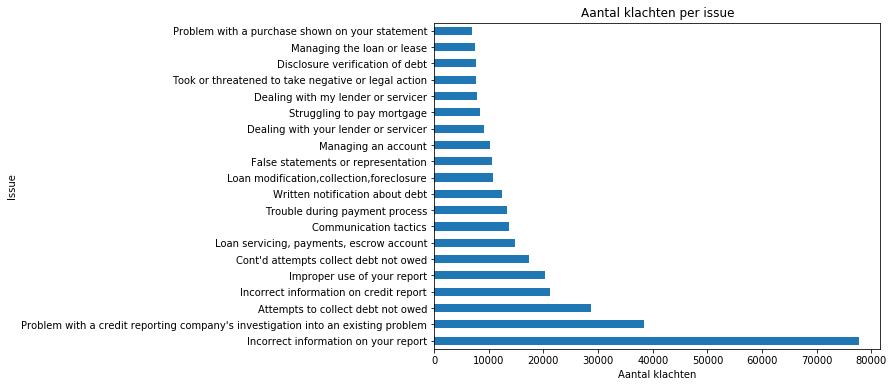

In [229]:
fig = plt.figure(figsize=(8,6))
issue_counts.sort_values(ascending=False).head(20).plot.barh(ylim=0, title="Aantal klachten per issue")
plt.xlabel('Aantal klachten', fontsize = 10);

Zoals je ziet zijn er veel verschillende issues (161) en is de data zeer ongebalanceerd. Daarom zullen we enkel de 20 meest voorkomende issues gebruiken om het model te trainen. Dit is namelijk 71% van alle data. Hier worden ze nog eens getoond.

In [230]:
som = 0
for aantal in issue_counts.sort_values(ascending=False).head(20):
    som += aantal
print('Percentage: ' + str(round(som/len(complaints.index)*100)) + '%')
issue_counts.sort_values(ascending=False).head(20)

Percentage: 71%


Issue
Incorrect information on your report                                                77776
Problem with a credit reporting company's investigation into an existing problem    38424
Attempts to collect debt not owed                                                   28629
Incorrect information on credit report                                              21217
Improper use of your report                                                         20239
Cont'd attempts collect debt not owed                                               17434
Loan servicing, payments, escrow account                                            14722
Communication tactics                                                               13711
Trouble during payment process                                                      13280
Written notification about debt                                                     12365
Loan modification,collection,foreclosure                                            10789
Fals

Wat opvalt is dat sommige categorieën een andere naam krijgen maar dat de data eigenlijk onder dezelfde categorie zou mogen geplaatst worden. Dit is bijvoorbeeld het geval bij 'Attempts to collect debt not owed' en 'Cont'd attempts collect debt not owed'. Daarom zullen we deze kolommen samen nemen onder dezelfde noemer.

In [231]:
df.replace({'Issue': 
            {'Cont\'d attempts collect debt not owed':'Attempts to collect debt not owed',
            'Dealing with my lender or servicer':'Dealing with your lender or servicer'}}, 
            inplace= True)
issue_counts = df.groupby('Issue')['Issue'].count()
#door 2 issues gelijk te stellen aan andere issues houden we er nog 18 verschillende over
issue_counts.sort_values(ascending=False).head(18)

Issue
Incorrect information on your report                                                77776
Attempts to collect debt not owed                                                   46063
Problem with a credit reporting company's investigation into an existing problem    38424
Incorrect information on credit report                                              21217
Improper use of your report                                                         20239
Dealing with your lender or servicer                                                17063
Loan servicing, payments, escrow account                                            14722
Communication tactics                                                               13711
Trouble during payment process                                                      13280
Written notification about debt                                                     12365
Loan modification,collection,foreclosure                                            10789
Fals

Nu filteren we de complaints zodat enkel degene met de meest voorkomende issues overblijven.

In [232]:
issue_list = ['Incorrect information on your report',
       'Attempts to collect debt not owed',
       'Problem with a credit reporting company\'s investigation into an existing problem',
       'Incorrect information on credit report',
       'Improper use of your report',
       'Dealing with your lender or servicer',
       'Loan servicing, payments, escrow account',
       'Communication tactics',
       'Trouble during payment process',
       'Written notification about debt',
       'Loan modification,collection,foreclosure',
       'False statements or representation',
       'Managing an account',
       'Struggling to pay mortgage',
       'Took or threatened to take negative or legal action',
       'Disclosure verification of debt',
       'Managing the loan or lease',
       'Problem with a purchase shown on your statement']
df = df[df['Issue'].isin(issue_list)]
#we laten de sub-issues er voorlopig uit
del df['Sub-issue']
df

,Issue,Narrative
1,False statements or representation,please review the current fraud account and al...
2,Attempts to collect debt not owed,Called multiple times over the years for a deb...
3,Attempts to collect debt not owed,I sent in a letter to the company to have them...
4,Improper use of your report,On XX/XX/19 I applied for a Debt Relief Produc...
5,Attempts to collect debt not owed,repeated letters to collect a debt that was wr...
...,...,...
485696,False statements or representation,This account was a payday loan from the XXXX X...
485697,"Loan servicing, payments, escrow account",We had a mortgage with XXXX that was discharge...
485698,Managing the loan or lease,I have 2003 XXXX financed through United Auto ...
485699,Managing the loan or lease,I was on automatic payment for my car loan. In...


Nu we een idee hebben van hoe de data verdeeld is en we enkele onzuiverheden weggewerkt hebben zullen we beginnen met text processing.

In [233]:
#imports
from nltk.tokenize import TweetTokenizer
import re, string
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
#lijst van leestekens
punctuations = list(set(string.punctuation))
#tokenizer definiëren
tokenizer = TweetTokenizer()
#functie die tekst omzet in tokens die dan gefilterd worden
def process_text(text):
    tokenized = tokenizer.tokenize(text)
    lower = [word.lower() for word in tokenized]
    no_num = [re.sub('[0-9]+', '', each) for each in lower]
    no_punc = [word for word in no_num if word not in punctuations]
    no_stop = [word for word in no_punc if word not in ENGLISH_STOP_WORDS]
    return no_stop
#functie toepassen op narratives
df['Tokenized'] = df.head(50000)['Narrative'].apply(process_text)
df.head(50000)

,Issue,Narrative,Tokenized
1,False statements or representation,please review the current fraud account and al...,"[review, current, fraud, account, fraudulent, ..."
2,Attempts to collect debt not owed,Called multiple times over the years for a deb...,"[called, multiple, times, years, debt, occurre..."
3,Attempts to collect debt not owed,I sent in a letter to the company to have them...,"[sent, letter, company, validate, debt, specia..."
4,Improper use of your report,On XX/XX/19 I applied for a Debt Relief Produc...,"[xx, xx, , applied, debt, relief, product, xxx..."
5,Attempts to collect debt not owed,repeated letters to collect a debt that was wr...,"[repeated, letters, collect, debt, written, co..."
...,...,...,...
63476,Incorrect information on your report,On XX/XX/XXXX I sent payoff check to collectio...,"[xx, xx, xxxx, sent, payoff, check, collection..."
63478,Took or threatened to take negative or legal a...,"XX/XX/2019, I received a certified mail from X...","[xx, xx, , received, certified, mail, xxxx, xx..."
63479,Dealing with your lender or servicer,"I have a loan being managed by AES, the origin...","[loan, managed, aes, original, balance, xxxx, ..."
63480,Incorrect information on your report,Error inquiry from XX/XX/2019. SyncB XXXX XXXX...,"[error, inquiry, xx, xx, , syncb, xxxx, xxxx, ..."


Nu hebben we al data die veel gemakkelijker gebruikt kan worden voor classificatie. De volgende stap is om de woordfrequenties te onderzoeken, per soort van issue. Deze frequenties worden hierna berekend.

In [236]:
#imports
from collections import Counter
from sklearn.preprocessing import LabelEncoder
#functie die de frequenties van de n meest voorkomende woorden in de narratives telt en deze in een dataframe stopt
def word_freq(tokens, n):
    merged = [item for sublist in tokens for item in sublist]
    counts = Counter(merged)
    top = counts.most_common(n)
    word = [w[0] for w in top]
    num = [w[1] for w in top]
    return pd.DataFrame([word, num]).T

#lijsten van dataframes
dataframes = []
test_dataframes = []

#elke issue overlopen
for i in range(len(issue_list)):
    #nieuwe dataframe voor specifieke issue
    new = df.head(50000).loc[df['Issue'] == issue_list[i]]
    #eerste 5 rijen opzij houden om later te testen
    test_dataframes.append(new.iloc[:5])
    #andere rijen toevo
    dataframes.append(new.iloc[5:])

#dataframes terug aan elkaar hangen
df = pd.concat(dataframes)
test_df = pd.concat(test_dataframes)

#nummer toewijzen aan issues
LE = LabelEncoder()
df['Issue_Id'] = LE.fit_transform(df['Issue'])

# display(df.groupby(['Issue'])['Narrative'].count())
# display(test_df.groupby(['Issue'])['Narrative'].count())
# display(df['Issue'].unique())
# display(df['Issue_Id'].unique())

#Top 20 woorden per issue

n = 20
frequencies = []

#elke issue overlopen
for i in range(len(issue_list)):
    tokens = dataframes[i]['Tokenized'].tolist()
    #word_freq functie toepassen
    frequencies.append(word_freq(tokens, n))

df_freq = pd.concat(frequencies, axis=1)
#kolomnamen duidelijker maken
col_names = []
for issue in issue_list:
    col_names.append(issue)
    col_names.append('freq')
df_freq.columns = col_names
df_freq

,Incorrect information on your report,freq,Attempts to collect debt not owed,freq,Problem with a credit reporting company's investigation into an existing problem,freq,Incorrect information on credit report,freq,Improper use of your report,freq,...,Struggling to pay mortgage,freq,Took or threatened to take negative or legal action,freq,Disclosure verification of debt,freq,Managing the loan or lease,freq,Problem with a purchase shown on your statement,freq
0,xxxx,190041,xxxx,44677,xxxx,74675,NaN,NaN,xxxx,40067,...,xxxx,16208,xxxx,14181,NaN,NaN,xxxx,4038,xxxx,19890
1,xx,41547,xx,13151,xx,23091,NaN,NaN,xx,14148,...,xx,7420,xx,4259,NaN,NaN,xx,2300,xx,9449
2,credit,38421,debt,9359,credit,20607,NaN,NaN,credit,8040,...,,3696,,2600,NaN,NaN,,1079,,4383
3,,36095,,8889,,18551,NaN,NaN,,6336,...,loan,3036,debt,2452,NaN,NaN,payment,1033,card,3948
4,information,23507,credit,8647,account,13677,NaN,NaN,inquiry,3925,...,mortgage,2683,credit,1824,NaN,NaN,car,639,credit,3086
5,report,22419,account,7174,report,11215,NaN,NaN,report,3633,...,modification,1945,account,1281,NaN,NaN,loan,616,account,2081
6,consumer,21942,report,4432,reporting,8727,NaN,NaN,inquiries,2278,...,home,1640,company,952,NaN,NaN,payments,551,charges,1867
7,account,20598,collection,3888,information,6895,NaN,NaN,information,2162,...,payment,1618,received,883,NaN,NaN,account,529,dispute,1788
8,reporting,20537,company,3850,accounts,5000,NaN,NaN,consumer,1527,...,payments,1251,collection,866,NaN,NaN,credit,468,charge,1714
9,accounts,12961,information,3356,late,4485,NaN,NaN,did,1406,...,foreclosure,1250,pay,772,NaN,NaN,told,420,did,1654


Uit deze data kunnen we nu een aantal features berekenen. Term frequency en inverse document frequency (tf-idf) zijn goede features om te bepalen hoe belangrijk bepaalde woorden zijn voor een categorie. We berekenen ze aan de hand van de hulpfunctie TfidfVectorizer.

In [242]:
#imports
from sklearn.feature_extraction.text import TfidfVectorizer

tokens = df.head(50000)['Tokenized'].astype('str')

#woorden die in meer dan 95% van de narratives voorkomen en woorden die in 5 of minder narratives voorkomen negeren 
tfidf_vectorizer = TfidfVectorizer(min_df = 5, 
                                   max_df = .95)

#features
X = tfidf_vectorizer.fit_transform(tokens)
#target
Y = df.head(50000)['Issue_Id'].values

print(X.shape)
print(Y.shape)

(49744, 104405)
(49744,)


We passen dimensionality reduction toe om de beste features uit te kiezen. Nu hebben we namelijk meer dan 100000 unieke woorden over 50000 rijen data. Hiervoor gebruiken we Latent Semantic Analysis (LSA).

In [241]:
#imports
from sklearn.decomposition import TruncatedSVD

lsa = TruncatedSVD(n_components=10000, 
                   n_iter=10, 
                   random_state=3)

X = lsa.fit_transform(X)
X.shape

(49744, 1000)

Nu kunnen we enkele classifiers uittesten. Hier testen we Random Forest en K-Nearest Neighbors.

In [245]:
#imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix

#training en test data opsplitsen
X_train, X_test, Y_train, Y_test = train_test_split(X, 
                                                    Y, 
                                                    test_size = .3, 
                                                    shuffle = True, 
                                                    stratify = y, 
                                                    random_state = 3)
rf = RandomForestClassifier(random_state=3)
rf.fit(X_train, Y_train)
y_pred = rf.predict(X_test)
print('Random forest:')
print('Accuracy: ' + str(accuracy_score(Y_test, y_pred)))
print('Precision: ' + str(precision_score(Y_test, y_pred, average='macro')))

knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
y_pred = knn.predict(X_test)
print('K-Nearest Neighbors:')
print('Accuracy: ' + str(accuracy_score(Y_test, y_pred)))
print('Precision: ' + str(precision_score(Y_test, y_pred, average='macro')))

C:\Users\thoma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random forest:
Accuracy: 0.6379656928437416
Precision: 0.6247097234948649
K-Nearest Neighbors:
Accuracy: 0.44170463682658806
Precision: 0.6379672242175095


C:\Users\thoma\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Zo te zien is de Random Forest classifier out of the box meer accuraat bij onze data dan K-Nearest Neighbors. 63% accuracy is echter nog niet ideaal. Om dit getal omhoog te krijgen zullen we aan hyperparameter tuning moeten doen.